In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## READ MNIST DATA

In [ ]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot


"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    return img, lbl
    


In [27]:
path = 'MNIST/'
X_train, y_train = read("testing", path)
X_test, y_test = read("training", path)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(60000, 784)
(60000,)


## Preprocessing with StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(np.sum(X_train_scaled[0]))

## SVM training

In [30]:
from sklearn import datasets, svm, metrics

classifier = svm.SVC(C=100,gamma = 0.001 ,random_state=108)

y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)
#18분

In [31]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))


Classification report for classifier SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=108, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5923
           1       0.97      0.98      0.97      6742
           2       0.91      0.94      0.92      5958
           3       0.94      0.91      0.93      6131
           4       0.94      0.95      0.94      5842
           5       0.94      0.93      0.94      5421
           6       0.96      0.95      0.96      5918
           7       0.89      0.95      0.92      6265
           8       0.95      0.91      0.93      5851
           9       0.94      0.91      0.93      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      

## K-FOLD CV

In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=classifier,
                         X=X_train_scaled,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.94 0.9  0.93 0.93 0.91 0.95 0.94 0.96 0.96 0.95]
CV accuracy: 0.937 +/- 0.019


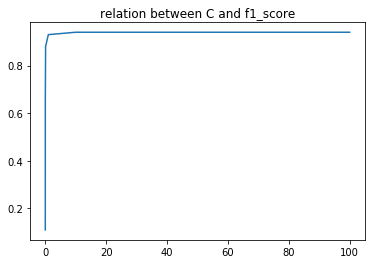

In [34]:
import matplotlib.pyplot as plt
"""
1000 = 0.94
100 = 0.94
10 = 0.94
5.0 = 0.94
4.5 = 0.94
3.5 = 0.94
2.5 = 0.94
2.0 = 0.94
1.6 = 0.94
1.45 = 0.94
1.15 = 0.94

1.1 = 0.93
1.0 = 0.93
0.95 = 0.93
0.85 = 0.93
0.75 = 0.93
0.65 = 0.93
0.6 = 0.93

0.55 = 0.92
0.45 = 0.92
0.35 = 0.92

0.25 = 0.91
0.2 = 0.91

0.15 = 0.9
0.1 = 0.88
0.05 = 0.85
0.01 = 0.65
0.001 = 0.11
"""
f1_score = [0.11, 0.65, 0.88, 0.93, 0.94, 0.94]
c = [0.001, 0.01, 0.1, 1.0, 10, 100]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)
plt.show()